In [39]:
import os
import scipy.io as sio
import numpy as np
import pandas as pd
import nibabel as nib

import matplotlib.pyplot as plt
import seaborn as sns

In [36]:
data_dir = '/Users/yibeichen/Desktop/fusi/task_data'
brain_file = os.path.join(data_dir, 'Grouper_audiocue_060324_2D.nii')
event_file = os.path.join(data_dir, 'Grouper_0603_behav.mat')

# read files
brain_img = nib.load(brain_file)
brain_data = brain_img.get_fdata()
print(f"Brain data shape: {brain_data.shape}")
event_mat = sio.loadmat(event_file)


pixdim[1,2,3] should be positive; setting to abs of pixdim values


Brain data shape: (128, 1, 143, 9000)


In [89]:
# brain_img.dataobj
behave_codes = event_mat["log_temp"][:]["BehavioralCodes"][0]
absolute_starttime = event_mat["log_temp"][:]["AbsoluteTrialStartTime"][0]
behave_codes.shape, absolute_starttime.shape

((150,), (150,))

In [151]:
tr = 1/2.5
n_tr = brain_data.shape[-1]
frame_times = np.arange(n_tr) * tr

behcodes = {9, 'start trial';  0, 'ttl triger'; 11, 'first secne start'; 2, 'scene start'; 5, 'reward'; 6, 'airpuff'; 7, 'idle'; 18, 'trial end'};

In [128]:
event_df1 = pd.DataFrame(columns=['onset', 'trial_type', 'duration', 'raw_onset'], index=range(len(behave_codes)))

for i, (c, s) in enumerate(zip(behave_codes, absolute_starttime)):
    trial_start = s[0][0]
    if i == 0:
        trial_type = c[0][0][1][4][0]
        stimulus_onset = c[0][0][0][4] + trial_start
    else:
        trial_type = c[0][0][1][2][0]
        stimulus_onset = c[0][0][0][2] + trial_start
        
    # duration = trial_start - stimulus_onset
    event_df1.at[i, 'raw_onset'] = stimulus_onset/1000
    event_df1.at[i, 'trial_type'] = str(trial_type)
    event_df1.at[i, 'duration'] = 2

event_df1['onset'] = event_df1['raw_onset'] - absolute_starttime[0][0]/1000

In [233]:
event_df2 = pd.DataFrame(columns=['onset', 'trial_type', 'duration', 'raw_onset'], index=range(len(behave_codes)))

for i, (c, s) in enumerate(zip(behave_codes, absolute_starttime)):
    trial_start = s[0][0]
    if i == 0:
        trial_type = c[0][0][1][4][0]
        stimulus_onset = c[0][0][0][4] + trial_start
    else:
        trial_type = c[0][0][1][2][0]
        stimulus_onset = c[0][0][0][2] + trial_start

    duration = stimulus_onset - trial_start + 2
    event_df2.at[i, 'raw_onset'] = stimulus_onset/1000 - 6
    event_df2.at[i, 'trial_type'] = str(trial_type)
    event_df2.at[i, 'duration'] = 8

event_df2['onset'] = event_df2['raw_onset'] - absolute_starttime[0][0]/1000

In [234]:
event_df3 = pd.DataFrame(columns=['onset', 'trial_type', 'duration', 'raw_onset'], index=range(len(behave_codes)))

for i, (c, s) in enumerate(zip(behave_codes, absolute_starttime)):
    trial_start = s[0][0]
    if i == 0:
        trial_type = c[0][0][1][4][0]
        stimulus_onset = c[0][0][0][4] + trial_start
    else:
        trial_type = c[0][0][1][2][0]
        stimulus_onset = c[0][0][0][2] + trial_start
    duration = stimulus_onset - trial_start + 2
    event_df3.at[i, 'raw_onset'] = stimulus_onset/1000 - 6
    event_df3.at[i, 'trial_type'] = str(trial_type)
    event_df3.at[i, 'duration'] = 2

event_df3['onset'] = event_df3['raw_onset'] - absolute_starttime[0][0]/1000

In [235]:
event_df1

,onset,trial_type,duration,raw_onset
0,26.162174,5,2,26.16217400000005
1,52.927676,6,2,52.92767570000024
2,78.846651,5,2,78.84665100000029
3,100.753939,5,2,100.75393890000034
4,126.772962,5,2,126.77296200000002
...,...,...,...,...
145,3562.76623,5,2,3562.7662296000003
146,3588.533493,5,2,3588.5334927000004
147,3610.258784,5,2,3610.2587836000002
148,3636.058771,5,2,3636.0587711999997


In [236]:
event_df2

,onset,trial_type,duration,raw_onset
0,20.162174,5,8,20.16217400000005
1,46.927676,6,8,46.92767570000024
2,72.846651,5,8,72.84665100000029
3,94.753939,5,8,94.75393890000034
4,120.772962,5,8,120.77296200000002
...,...,...,...,...
145,3556.76623,5,8,3556.7662296000003
146,3582.533493,5,8,3582.5334927000004
147,3604.258784,5,8,3604.2587836000002
148,3630.058771,5,8,3630.0587711999997


In [237]:
event_df3

,onset,trial_type,duration,raw_onset
0,20.162174,5,2,20.16217400000005
1,46.927676,6,2,46.92767570000024
2,72.846651,5,2,72.84665100000029
3,94.753939,5,2,94.75393890000034
4,120.772962,5,2,120.77296200000002
...,...,...,...,...
145,3556.76623,5,2,3556.7662296000003
146,3582.533493,5,2,3582.5334927000004
147,3604.258784,5,2,3604.2587836000002
148,3630.058771,5,2,3630.0587711999997


In [238]:
from nilearn.glm.first_level import make_first_level_design_matrix
hrf_model = 'glover'
X1 = make_first_level_design_matrix(
    frame_times = np.arange(n_tr)*tr,
    events = event_df1,
    drift_model='polynomial',
    drift_order=3,
    hrf_model=hrf_model
)

X2 = make_first_level_design_matrix(
    frame_times = np.arange(n_tr)*tr,
    events = event_df2,
    drift_model='polynomial',
    drift_order=3,
    hrf_model=hrf_model
)

X3 = make_first_level_design_matrix(
    frame_times = np.arange(n_tr)*tr,
    events = event_df3,
    drift_model='polynomial',
    drift_order=3,
    hrf_model=hrf_model
)

/Users/yibeichen/micromamba/envs/neuro/lib/python3.10/site-packages/nilearn/glm/first_level/experimental_paradigm.py:167: UserWarning: The following unexpected columns in events data will be ignored: raw_onset
  warnings.warn(
/Users/yibeichen/micromamba/envs/neuro/lib/python3.10/site-packages/nilearn/glm/first_level/experimental_paradigm.py:167: UserWarning: The following unexpected columns in events data will be ignored: raw_onset
  warnings.warn(
/Users/yibeichen/micromamba/envs/neuro/lib/python3.10/site-packages/nilearn/glm/first_level/experimental_paradigm.py:167: UserWarning: The following unexpected columns in events data will be ignored: raw_onset
  warnings.warn(


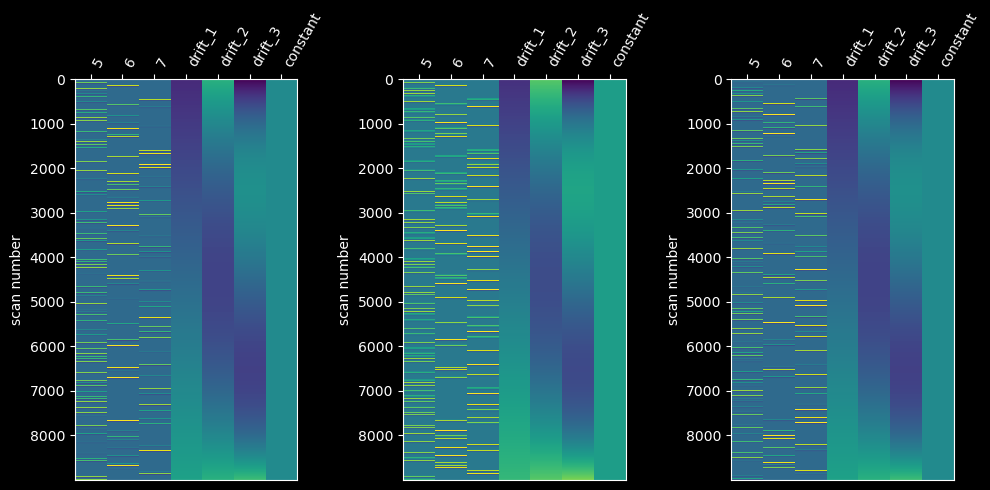

In [239]:
from nilearn.plotting import plot_design_matrix

fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(10, 5))

plot_design_matrix(X1, ax=ax1)
plot_design_matrix(X2, ax=ax2)
plot_design_matrix(X3, ax=ax3)

plt.show()

In [252]:
X1

,5,6,7,drift_1,drift_2,drift_3,constant
0.0,0.000000,0.0,0.0,-0.500000,0.166648,-0.049983,1.0
0.4,0.000000,0.0,0.0,-0.499889,0.166537,-0.049917,1.0
0.8,0.000000,0.0,0.0,-0.499778,0.166426,-0.049850,1.0
1.2,0.000000,0.0,0.0,-0.499667,0.166315,-0.049783,1.0
1.6,0.000000,0.0,0.0,-0.499556,0.166204,-0.049717,1.0
...,...,...,...,...,...,...,...
3598.0,0.153544,0.0,0.0,0.499556,0.166204,0.049717,1.0
3598.4,0.102931,0.0,0.0,0.499667,0.166315,0.049783,1.0
3598.8,0.057864,0.0,0.0,0.499778,0.166426,0.049850,1.0
3599.2,0.018879,0.0,0.0,0.499889,0.166537,0.049917,1.0


In [240]:
Y = brain_data.reshape(-1, brain_data.shape[-1])

In [242]:
from nilearn.glm.first_level import run_glm

labels1, estimators1 = run_glm(Y.T, X1.values)
labels2, estimators2 = run_glm(Y.T, X2.values)
labels3, estimators3 = run_glm(Y.T, X3.values)

In [243]:
contrast_matrix1 = np.eye(X1.shape[1])
contrast_matrix2 = np.eye(X2.shape[1])
contrast_matrix3 = np.eye(X3.shape[1])

In [244]:
basic_contrasts1 = dict([(column, contrast_matrix1[i]) for i, column in enumerate(X1.columns)])
basic_contrasts2 = dict([(column, contrast_matrix2[i]) for i, column in enumerate(X2.columns)])
basic_contrasts3 = dict([(column, contrast_matrix3[i]) for i, column in enumerate(X3.columns)])

In [245]:
basic_contrasts1

{'5': array([1., 0., 0., 0., 0., 0., 0.]),
 '6': array([0., 1., 0., 0., 0., 0., 0.]),
 '7': array([0., 0., 1., 0., 0., 0., 0.]),
 'drift_1': array([0., 0., 0., 1., 0., 0., 0.]),
 'drift_2': array([0., 0., 0., 0., 1., 0., 0.]),
 'drift_3': array([0., 0., 0., 0., 0., 1., 0.]),
 'constant': array([0., 0., 0., 0., 0., 0., 1.])}

In [246]:
contrast1 = {
    'reward': basic_contrasts1['5'],
    'airpuff': basic_contrasts1['6'],
    'idle': basic_contrasts1['7'],
    'reward - airpuff': basic_contrasts1['5'] - basic_contrasts1['6'],
    'reward - idle': basic_contrasts1['5'] - basic_contrasts1['7'],
    'airpuff - idle': basic_contrasts1['6'] - basic_contrasts1['7'],
}

contrast2 = {
    'reward': basic_contrasts2['5'],
    'airpuff': basic_contrasts2['6'],
    'idle': basic_contrasts2['7'],
    'reward - airpuff': basic_contrasts2['5'] - basic_contrasts2['6'],
    'reward - idle': basic_contrasts2['5'] - basic_contrasts2['7'],
    'airpuff - idle': basic_contrasts2['6'] - basic_contrasts2['7'],
}

contrast3 = {
    'reward': basic_contrasts3['5'],
    'airpuff': basic_contrasts3['6'],
    'idle': basic_contrasts3['7'],
    'reward - airpuff': basic_contrasts3['5'] - basic_contrasts3['6'],
    'reward - idle': basic_contrasts3['5'] - basic_contrasts3['7'],
    'airpuff - idle': basic_contrasts3['6'] - basic_contrasts3['7'],
}

In [247]:
from nilearn.glm.contrasts import compute_contrast

contrast_results1 = {key: None for key in contrast1.keys()}
for index, (contrast_id, contrast_value) in enumerate(contrast1.items()):
    contrast = compute_contrast(labels1, estimators1, contrast_value, stat_type='t')
    contrast_results1[contrast_id] = contrast.z_score()

contrast_results2 = {key: None for key in contrast2.keys()}
for index, (contrast_id, contrast_value) in enumerate(contrast2.items()):
    contrast = compute_contrast(labels2, estimators2, contrast_value, stat_type='t')
    contrast_results2[contrast_id] = contrast.z_score()

contrast_results3 = {key: None for key in contrast3.keys()}
for index, (contrast_id, contrast_value) in enumerate(contrast3.items()):
    contrast = compute_contrast(labels3, estimators3, contrast_value, stat_type='t')
    contrast_results3[contrast_id] = contrast.z_score()

In [197]:
contrast_results1['reward'].shape

(18304,)

In [199]:
contrast_results1.keys()

dict_keys(['reward', 'airpuff', 'idle', 'reward - airpuff', 'reward - idle', 'airpuff - idle'])

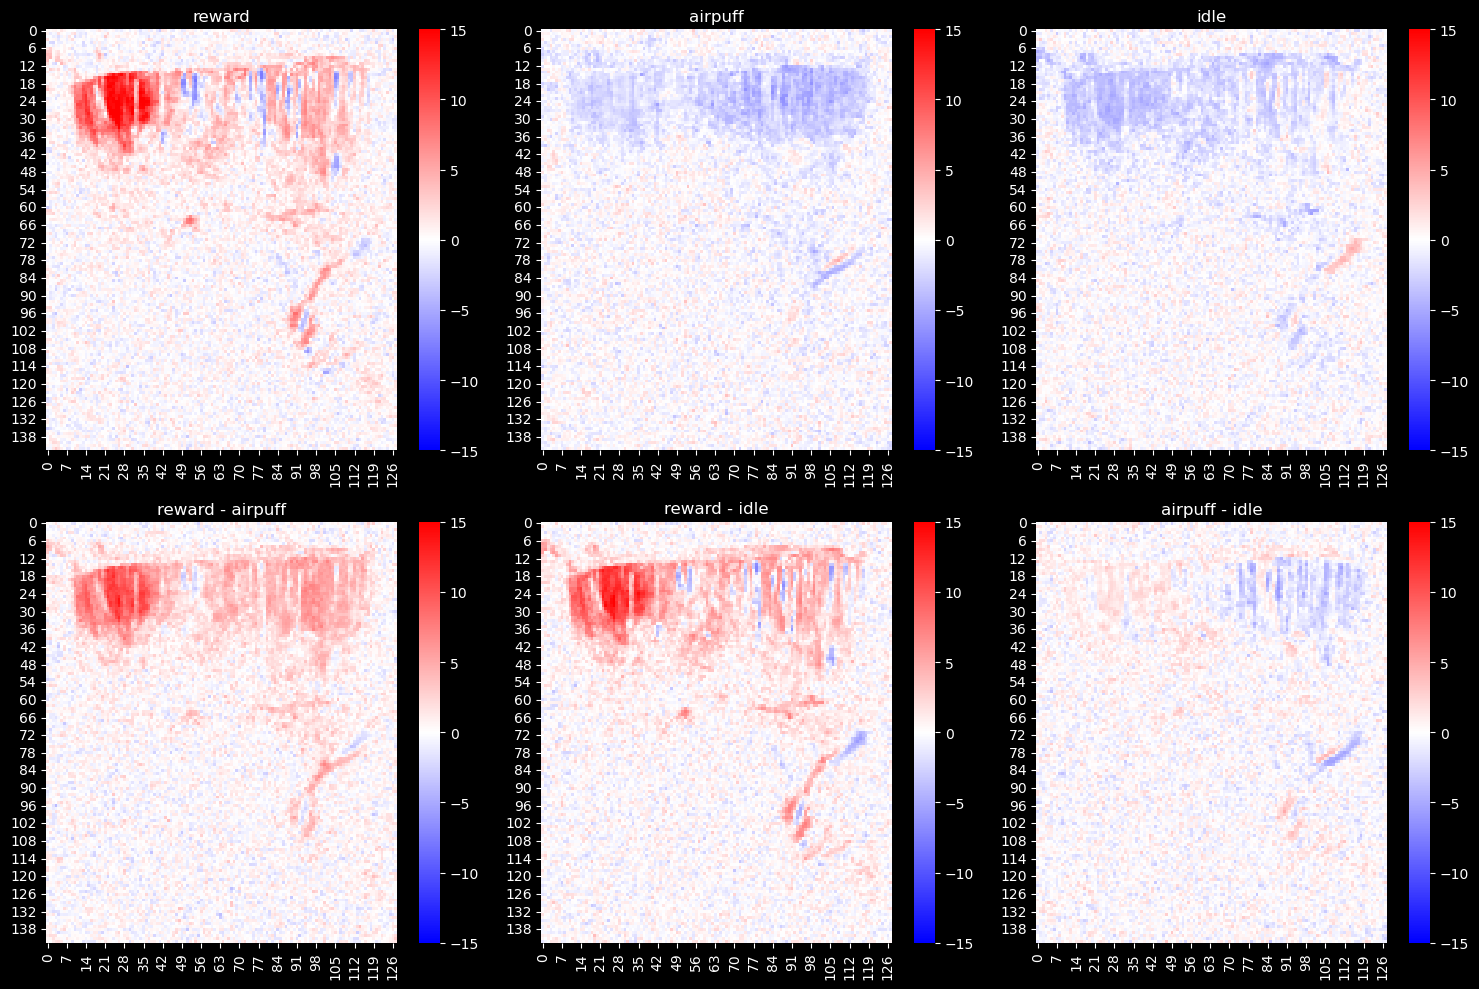

In [249]:
fig, axes = plt.subplots(2, 3, figsize=(15, 10))

# Flatten the axes array for easy iteration
axes = axes.flatten()

# Iterate over the dictionary and plot each heatmap
for i, (key, value) in enumerate(contrast_results1.items()):
    
    sns.heatmap(value.reshape(128, 143).T, ax=axes[i], cmap="bwr", vmin=-15, vmax=15)
    axes[i].set_title(key)

# Adjust the layout
plt.tight_layout()

# Show the plot
plt.show()

In [253]:
contrast_results1['reward'].shape

(18304,)

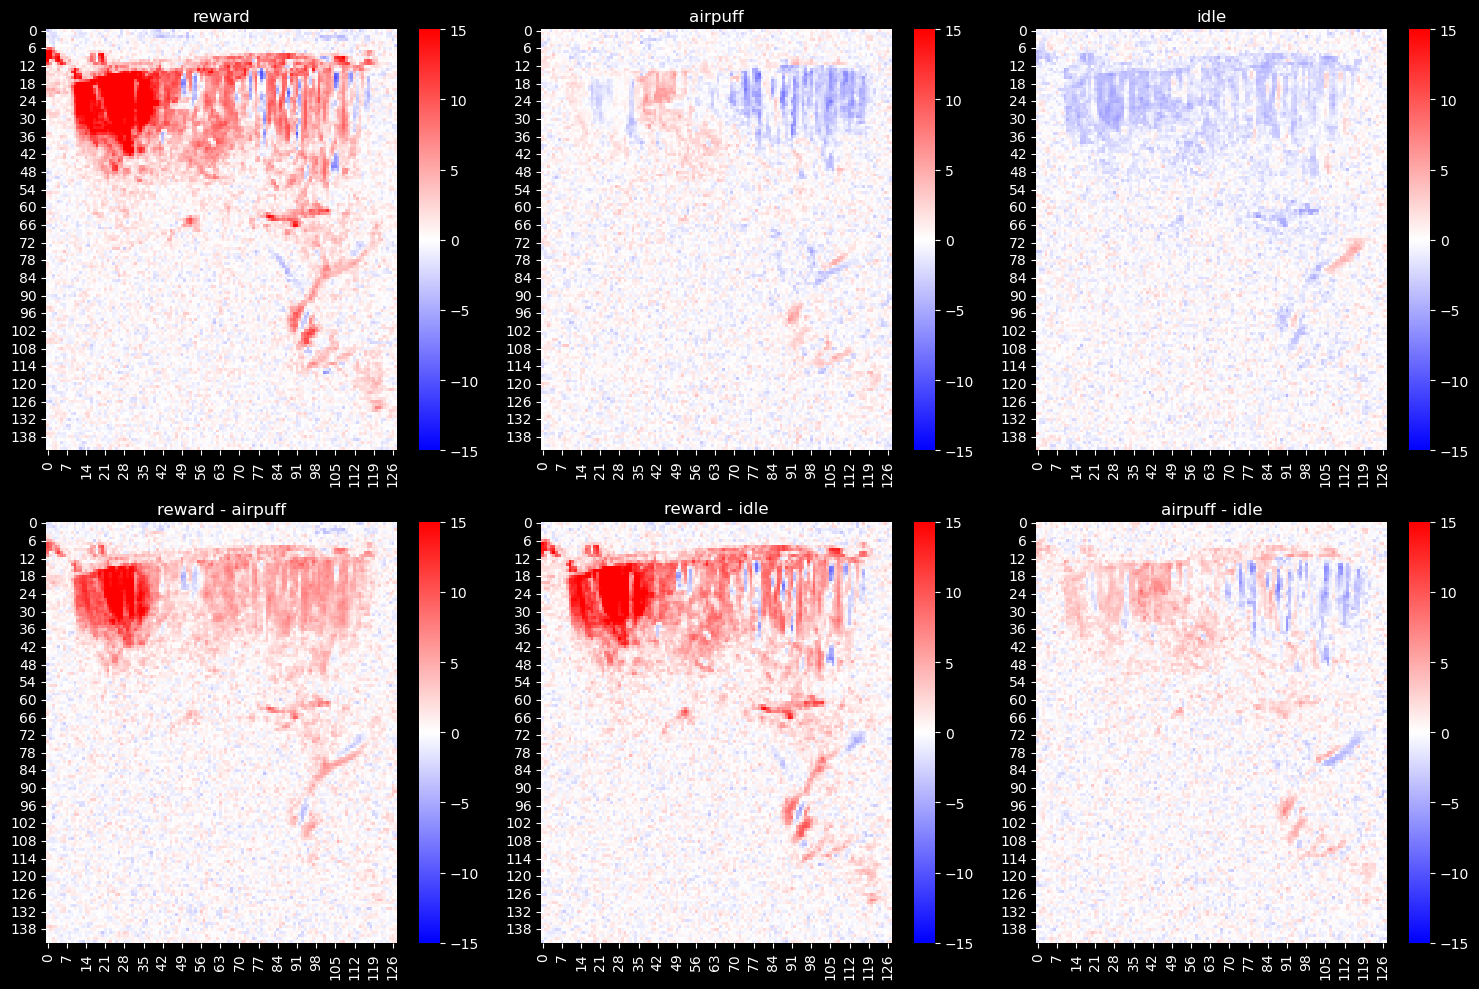

In [250]:
fig, axes = plt.subplots(2, 3, figsize=(15, 10))

# Flatten the axes array for easy iteration
axes = axes.flatten()

# Iterate over the dictionary and plot each heatmap
for i, (key, value) in enumerate(contrast_results2.items()):
    
    sns.heatmap(value.reshape(128, 143).T, ax=axes[i], cmap="bwr", vmin=-15, vmax=15)
    axes[i].set_title(key)

# Adjust the layout
plt.tight_layout()

# Show the plot
plt.show()

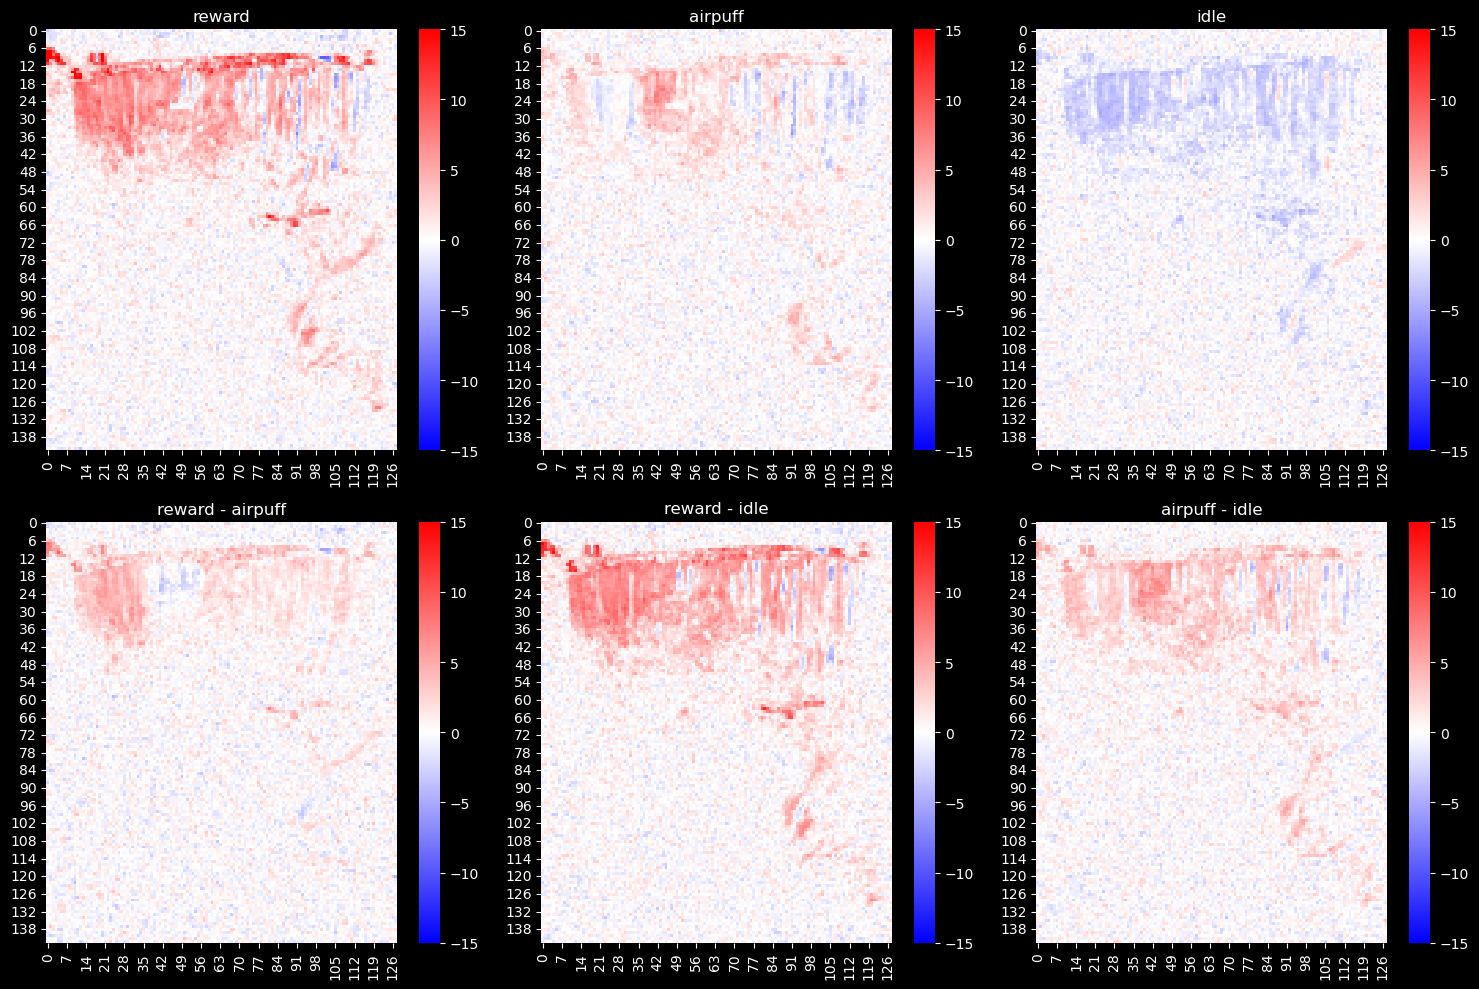

In [251]:
fig, axes = plt.subplots(2, 3, figsize=(15, 10))

# Flatten the axes array for easy iteration
axes = axes.flatten()

# Iterate over the dictionary and plot each heatmap
for i, (key, value) in enumerate(contrast_results3.items()):
    
    sns.heatmap(value.reshape(128, 143).T, ax=axes[i], cmap="bwr", vmin=-15, vmax=15)
    axes[i].set_title(key)

# Adjust the layout
plt.tight_layout()

# Show the plot
plt.show()